In [175]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from numpy.linalg import eig, det
import matplotlib.pyplot as plt

# Création des données
data = {
    'Pays': ['A', 'B', 'C', 'D'],
    'IDE': [300, 450, 950, 700],
    'Taux_croissance': [2, 2, 8, 7],
    'Taux_inflation': [6, 4, 2, 5]
}
df = pd.DataFrame(data)
X = df[['IDE', 'Taux_croissance', 'Taux_inflation']].values

# 1. Calcul de la moyenne et de l'écart type

### Moyenne et Écart-type

Pour chaque variable $( X )$, les statistiques sont calculées comme suit :

#### Moyenne :
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

#### Écart-type (échantillon) :
$$
\sigma = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }
$$

où :
- $( n )$ est le nombre d'observations,
- $( x_i )$ est la valeur de la variable pour l'observation $( i )$.

In [176]:
# 1. Calcul de la moyenne et de l'écart type
means = np.mean(X, axis=0)
#stds = np.std(X, axis=0, ddof=1)
stds_b =  np.std(X, axis=0, ddof=0)
print("1. Moyennes:", means)
print("Écarts-types:", stds_b)

1. Moyennes: [600.     4.75   4.25]
Écarts-types: [247.48737342   2.77263413   1.47901995]


# 2. Matrice centrée réduite

### Matrice centrée réduite (standardisation)

#### Definition: 
La matrice centrée réduite (ou matrice standardisée), chaque variable doit étre transformée pour avoir une moyenne de 0 et un écart-type de 1

Pour chaque élément $( x_{ij} )$ d'une variable $( j )$ et d'une observation $( i )$, la formule de standardisation est :

$$
z_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
$$

où :

- $( x_{ij} )$ est la valeur brute de l’observation $( i )$ pour la variable $( j )$,
- $( \bar{x}_j )$ est la moyenne de la variable $( j )$,
- $( s_j )$ est l’écart-type (non biaisé) de la variable $( j )$,
- $( z_{ij} )$ est la valeur centrée réduite.

L’ensemble des $( z_{ij} )$ forme la **matrice centrée réduite** $( Z )$.


In [191]:
# 2. Matrice centrée réduite
X_cr = (X - means) / stds_b
#print("\n2. Matrice centrée réduite:\n", X_cr)
print("\n2. Matrice centrée réduite:\n", np.round(X_cr, 2))


2. Matrice centrée réduite:
 [[-1.21 -0.99  1.18]
 [-0.61 -0.99 -0.17]
 [ 1.41  1.17 -1.52]
 [ 0.4   0.81  0.51]]


In [192]:
# Test de la moyenne et de l'écart type
means2= np.mean(X_cr)
stds_b2 =  np.std(X_cr, axis=0, ddof=0)
print("1. Moyennes:", means2)
print("Écarts-types:", stds_b2)

1. Moyennes: 0.0
Écarts-types: [1. 1. 1.]


# 3. Matrice des variances-covariances

### Matrice des variances-covariances

La **matrice des variances-covariances** est notée $( \Sigma )$ et se calcule par :

$$
\Sigma = \frac{1}{n - 1} (X - \bar{X})^T (X - \bar{X})
$$

où :

- $( X )$ est la matrice des données brutes (n observations, p variables),
- $( \bar{X} )$ est la matrice des moyennes (chaque colonne centrée),
- $( n )$ est le nombre d’observations.

Chaque élément $( \sigma_{ij} )$ représente la covariance entre les variables $( i )$ et $( j )$.  
La diagonale contient les variances de chaque variable.

> ⚠️ On utilise $( n - 1 )$ car on suppose que les données représentent un **échantillon**.


In [179]:
# 3. Matrice des variances-covariances
cov_matrix = np.cov(X_cr.T, ddof=0)
print("\n3. Matrice des variances-covariances:\n", cov_matrix.round(2))




3. Matrice des variances-covariances:
 [[ 1.    0.95 -0.82]
 [ 0.95  1.   -0.59]
 [-0.82 -0.59  1.  ]]


# 4. Matrice des corrélations


### Matrice des corrélations

La **matrice des corrélations** $( R )$ est définie par :

$$
R = \left[ r_{ij} \right] \quad \text{où} \quad r_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sigma_i \cdot \sigma_j}
$$

où :

- $( \text{Cov}(X_i, X_j) )$ est la covariance entre les variables $( X_i )$ et $( X_j )$,
- $( \sigma_i )$ et $( \sigma_j )$ sont les écarts-types des variables $( X_i )$ et $( X_j )$,
- $( r_{ij} \in [-1, 1] )$ est le coefficient de corrélation de Pearson.

La diagonale contient des 1, car chaque variable est parfaitement corrélée avec elle-même.


In [180]:
# 4. Matrice des corrélations
corr_matrix = np.corrcoef(X_cr.T)
print("\n4. Matrice des corrélations:\n", corr_matrix.round(2))


4. Matrice des corrélations:
 [[ 1.    0.95 -0.82]
 [ 0.95  1.   -0.59]
 [-0.82 -0.59  1.  ]]


# 5. Polynôme caractéristique


### Polynôme caractéristique

Le **polynôme caractéristique** d'une matrice $( A \in \mathbb{R}^{n \times n} )$ est défini par :

$$
P(\lambda) = \det(A - \lambda I)
$$

où :

- $( \lambda )$ est une variable scalaire,
- $( I )$ est la matrice identité de même dimension que $( A )$,
- $( \det )$ désigne le déterminant.

Les **racines** du polynôme caractéristique sont les **valeurs propres** de la matrice $( A )$.


In [181]:
# 5. Polynôme caractéristique
# Pour une matrice 3x3, le polynôme caractéristique est det(A - λI) = 0
# Calculer manuellement pour plus de clarté
def char_poly(lamb, A):
    I = np.eye(A.shape[0])
    A_minus_lambda_I = A - lamb * I
    return det(A_minus_lambda_I)

# 6. Calcul des valeurs propres


### Valeurs propres d'une matrice

Les **valeurs propres** $( \lambda )$ d’une matrice $( A )$ sont les solutions de :

$$
\det(A - \lambda I) = 0
$$

où :

- $( A )$ est une matrice carrée (ici, la matrice des corrélations),
- $( I )$ est la matrice identité de même dimension que $( A )$,
- $( \lambda )$ sont les **valeurs propres** de $( A )$.

Chaque valeur propre correspond à une **composante principale** dans une ACP.


In [182]:
# 6. Calcul des valeurs propres
eigenvalues, eigenvectors = eig(cov_matrix)
print("\n6. Valeurs propres:", eigenvalues)


6. Valeurs propres: [2.58284840e+00 5.63943272e-04 4.16587657e-01]


# 7. Inertie des axes factoriels


### Inertie des axes factoriels

L’**inertie** associée à une valeur propre $( \lambda_j )$ est la part de la variance totale expliquée par le **jᵉ axe principal** :

$$
I_j = \frac{\lambda_j}{\sum_{k=1}^{p} \lambda_k}
$$

L’**inertie cumulée** jusqu’au jᵉ axe est :

$$
CI_j = \sum_{k=1}^{j} I_k
$$

où :

- $( \lambda_j )$ est la jᵉ valeur propre,
- $( p )$ est le nombre total de variables.

> En ACP, on retient souvent les axes expliquant ensemble au moins **80 %** de la variance.


In [183]:

# 7. Inertie des axes factoriels
total_inertia = np.sum(eigenvalues)
inertia_percent = (eigenvalues / total_inertia) * 100
print("\n7. Inertie des axes factoriels (%):", inertia_percent)
print("Inertie totale:", total_inertia)


7. Inertie des axes factoriels (%): [8.60949467e+01 1.87981091e-02 1.38862552e+01]
Inertie totale: 2.9999999999999973


# 8. Vecteurs propres orthogonaux


### Vecteurs propres associés aux valeurs propres

Les vecteurs propres $( v_j )$ sont les solutions de l’équation :

$$
A \cdot v_j = \lambda_j \cdot v_j
$$

où :

- $( A )$ est la matrice carrée (ici, la matrice des corrélations),
- $( \lambda_j )$ est une valeur propre,
- $( v_j )$ est un vecteur propre associé à $( \lambda_j )$.

Ces vecteurs sont **orthogonaux entre eux** et **normalisés** (longueur = 1).
Ils définissent les nouveaux axes principaux du nuage de données.


In [184]:
# 8. Vecteurs propres orthogonaux
print("\n8. Vecteurs propres:\n", eigenvectors)


8. Vecteurs propres:
 [[ 0.62025991  0.77518972  0.11982712]
 [ 0.57253946 -0.55184094  0.6063581 ]
 [-0.53616807  0.30749386  0.78611152]]


# 9. Corrélation des variables avec les composantes principales


### Corrélation entre variables et composantes principales

La corrélation entre une variable $( X_i )$ et une composante principale $( C_j )$ est :

$$
\text{corr}(X_i, C_j) = \sqrt{\lambda_j} \cdot v_{ij}
$$

où :

- $( \lambda_j )$ est la jᵉ valeur propre,
- $( v_{ij} )$ est la iᵉ coordonnée du jᵉ vecteur propre.

> Ces corrélations permettent de comprendre quelles variables sont les plus représentées dans chaque axe principal.


In [185]:
# 9. Corrélation des variables avec les composantes principales
# Corrélation = vecteurs propres * sqrt(valeurs propres)
correlations = eigenvectors * np.sqrt(eigenvalues)
print("\n9. Corrélations des variables avec les composantes principales:\n", correlations)


9. Corrélations des variables avec les composantes principales:
 [[ 0.99683475  0.01840881  0.07734074]
 [ 0.92014207 -0.01310484  0.39136536]
 [-0.86168872  0.00730221  0.50738469]]


# 10. Contribution des individus (CONTR)


### Contribution d’une variable à une composante principale

La contribution d’une variable $( X_i )$ à la composante principale $( C_j )$ est :

$$
\text{CONTR}(X_i, C_j) = \frac{\text{corr}(X_i, C_j)^2}{\lambda_j}
$$

où :

- $( \text{corr}(X_i, C_j) )$ est la corrélation entre la variable $( X_i )$ et l’axe $( C_j )$,
- $( \lambda_j )$ est la valeur propre associée à $( C_j )$.

> Cela permet de savoir quelles variables contribuent le plus à chaque axe.


In [186]:
# 10. Contribution des individus (CONTR)
# Calcul des coordonnées des individus sur les axes principaux
coords = X_cr @ eigenvectors
contr = (coords**2 / np.sum(coords**2, axis=0)) * 100
#print("\n10. Contributions des individus (%):\n", contr)
print("\n10. Contributions des individus (%):\n", np.around(contr, 2))


10. Contributions des individus (%):
 [[36.96 36.02  2.02]
 [ 7.05 28.88 39.07]
 [54.09 14.93  5.98]
 [ 1.9  20.17 52.93]]


# Visualisation des résultats (optionnel)


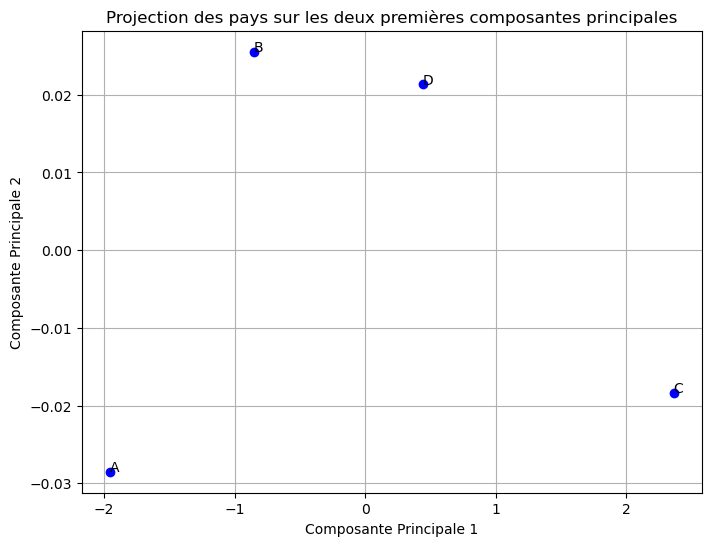

In [188]:
# Visualisation des résultats (optionnel)
plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1], c='blue')
for i, pays in enumerate(df['Pays']):
    plt.text(coords[i, 0], coords[i, 1], pays)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des pays sur les deux premières composantes principales')
plt.grid(True)
plt.savefig('acp_plot.png')